> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [Dataset-name]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description
#### The chosen data is the FBI Gun Data. There are two csv files. One of them is gun data, which includes background check counts from Nov. 1998 to Sep. 2017 for multiple gun categories. The other csv file is U.S. census data, which includes multiple facts for each of the listed 50 states, and those facts are for different time periods.

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected/downloaded for analysis. Read through the description available on the homepage-links present [here](https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True). List all column names in each table, and their significance. In case of multiple tables, describe the relationship between tables. 


### Question(s) for Analysis
#### Q1. Which states have had the highest growth in gun sales?
#### Q2. What census data is most associated with gun per capita?
>**Tip**: Clearly state one or more questions that you plan on exploring over the course of the report. You will address these questions in the **data analysis** and **conclusion** sections. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> **Tip**: Once you start coding, use NumPy arrays, Pandas Series, and DataFrames where appropriate rather than Python lists and dictionaries. Also, **use good coding practices**, such as, define and use functions to avoid repetitive code. Use appropriate comments within the code cells, explanation in the mark-down cells, and meaningful variable names. 

In [8]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [ ]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

In [ ]:
!pip install --upgrade matplotlib

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [9]:
df1 = pd.read_csv('gun_data.csv')
df2 = pd.read_csv('US_Census_Data.csv')

In [10]:
df1.head()

month       state   permit  permit_recheck  handgun  long_gun   other  \
0  2017-09     Alabama  16717.0             0.0   5734.0    6320.0   221.0   
1  2017-09      Alaska    209.0             2.0   2320.0    2930.0   219.0   
2  2017-09     Arizona   5069.0           382.0  11063.0    7946.0   920.0   
3  2017-09    Arkansas   2935.0           632.0   4347.0    6063.0   165.0   
4  2017-09  California  57839.0             0.0  37165.0   24581.0  2984.0   

   multiple  admin  prepawn_handgun   ...    returned_other  rentals_handgun  \
0       317    0.0             15.0   ...               0.0              0.0   
1       160    0.0              5.0   ...               0.0              0.0   
2       631    0.0             13.0   ...               0.0              0.0   
3       366   51.0             12.0   ...               0.0              0.0   
4         0    0.0              0.0   ...               0.0              0.0   

   rentals_long_gun  private_sale_handgun  private_sale_long_gun  \
0               0.0                   9.0                   16.0   
1               0.0                  17.0                   24.0   
2               0.0                  38.0                   12.0   
3               0.0                  13.0                   23.0   
4               0.0                   0.0                    0.0   

   private_sale_other  return_to_seller_handgun  return_to_seller_long_gun  \
0                 3.0                       0.0                        0.0   
1                 1.0                       0.0                        0.0   
2                 2.0                       0.0                        0.0   
3                 0.0                       0.0                        2.0   
4                 0.0                       0.0                        0.0   

   return_to_seller_other  totals  
0                     3.0   32019  
1                     0.0    6303  
2                     0.0   28394  
3                     1.0   17747  
4                     0.0  123506  

[5 rows x 27 columns]

In [11]:
df2.head()

Fact Fact Note    Alabama  \
0       Population estimates, July 1, 2016,  (V2016)       NaN  4,863,300   
1  Population estimates base, April 1, 2010,  (V2...       NaN  4,780,131   
2  Population, percent change - April 1, 2010 (es...       NaN      1.70%   
3                  Population, Census, April 1, 2010       NaN  4,779,736   
4  Persons under 5 years, percent, July 1, 2016, ...       NaN      6.00%   

    Alaska    Arizona   Arkansas  California   Colorado Connecticut Delaware  \
0  741,894  6,931,071  2,988,248  39,250,017  5,540,545   3,576,452  952,065   
1  710,249  6,392,301  2,916,025  37,254,522  5,029,324   3,574,114  897,936   
2    4.50%      8.40%      2.50%       5.40%     10.20%       0.10%    6.00%   
3  710,231  6,392,017  2,915,918  37,253,956  5,029,196   3,574,097  897,934   
4    7.30%      6.30%      6.40%       6.30%      6.10%       5.20%    5.80%   

    ...    South Dakota Tennessee       Texas       Utah  Vermont   Virginia  \
0   ...          865454   6651194  27,862,596  3,051,217  624,594  8,411,808   
1   ...          814195   6346298  25,146,100  2,763,888  625,741  8,001,041   
2   ...           0.063     0.048      10.80%     10.40%   -0.20%      5.10%   
3   ...          814180   6346105  25,145,561  2,763,885  625,741  8,001,024   
4   ...           0.071     0.061       7.20%      8.30%    4.90%      6.10%   

  Washington West Virginia  Wisconsin  Wyoming  
0  7,288,000     1,831,102  5,778,708  585,501  
1  6,724,545     1,853,011  5,687,289  563,767  
2      8.40%        -1.20%      1.60%    3.90%  
3  6,724,540     1,852,994  5,686,986  563,626  
4      6.20%         5.50%      5.80%    6.50%  

[5 rows x 52 columns]


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

# First, df1

In [12]:
new_df1 = df1[['month','state', 'handgun', 'long_gun', 'multiple']]
new_df1.head()

month       state  handgun  long_gun  multiple
0  2017-09     Alabama   5734.0    6320.0       317
1  2017-09      Alaska   2320.0    2930.0       160
2  2017-09     Arizona  11063.0    7946.0       631
3  2017-09    Arkansas   4347.0    6063.0       366
4  2017-09  California  37165.0   24581.0         0

### https://github.com/BuzzFeedNews/nics-firearm-background-checks/blob/master/README.md
### According to the notes only handgun, long gun and multiple were used to estimate gun sales
### so we deleted the other columns except month and state


In [13]:
new_df1.shape

(12485, 5)

In [14]:
new_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 5 columns):
month       12485 non-null object
state       12485 non-null object
handgun     12465 non-null float64
long_gun    12466 non-null float64
multiple    12485 non-null int64
dtypes: float64(2), int64(1), object(2)
memory usage: 487.8+ KB


In [15]:
new_df1 = new_df1.dropna(subset=['handgun', 'long_gun'])
new_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12465 entries, 0 to 12484
Data columns (total 5 columns):
month       12465 non-null object
state       12465 non-null object
handgun     12465 non-null float64
long_gun    12465 non-null float64
multiple    12465 non-null int64
dtypes: float64(2), int64(1), object(2)
memory usage: 584.3+ KB


### handgun and long_gun had missing values, so we dropped them.

In [16]:
new_df1.handgun = new_df1.handgun.astype(int)
new_df1.long_gun = new_df1.long_gun.astype(int)
new_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12465 entries, 0 to 12484
Data columns (total 5 columns):
month       12465 non-null object
state       12465 non-null object
handgun     12465 non-null int64
long_gun    12465 non-null int64
multiple    12465 non-null int64
dtypes: int64(3), object(2)
memory usage: 584.3+ KB


### handgun and long_gun are both counted numbers, like multiple
### there is no reason to make them float, so we changed them to int

In [17]:
new_df1.duplicated().sum()

0

### No duplicates, good!

In [18]:
new_df1.tail()

month          state  handgun  long_gun  multiple
12480  1998-11       Virginia       14         2         8
12481  1998-11     Washington       65       286         8
12482  1998-11  West Virginia      149       251         5
12483  1998-11      Wisconsin       25       214         2
12484  1998-11        Wyoming       45        49         5

# Next, df2

In [19]:
df2.drop(['Fact Note'], axis=1, inplace=True)

In [20]:
df2.head()

Fact    Alabama   Alaska  \
0       Population estimates, July 1, 2016,  (V2016)  4,863,300  741,894   
1  Population estimates base, April 1, 2010,  (V2...  4,780,131  710,249   
2  Population, percent change - April 1, 2010 (es...      1.70%    4.50%   
3                  Population, Census, April 1, 2010  4,779,736  710,231   
4  Persons under 5 years, percent, July 1, 2016, ...      6.00%    7.30%   

     Arizona   Arkansas  California   Colorado Connecticut Delaware  \
0  6,931,071  2,988,248  39,250,017  5,540,545   3,576,452  952,065   
1  6,392,301  2,916,025  37,254,522  5,029,324   3,574,114  897,936   
2      8.40%      2.50%       5.40%     10.20%       0.10%    6.00%   
3  6,392,017  2,915,918  37,253,956  5,029,196   3,574,097  897,934   
4      6.30%      6.40%       6.30%      6.10%       5.20%    5.80%   

      Florida   ...    South Dakota Tennessee       Texas       Utah  Vermont  \
0  20,612,439   ...          865454   6651194  27,862,596  3,051,217  624,594   
1  18,804,592   ...          814195   6346298  25,146,100  2,763,888  625,741   
2       9.60%   ...           0.063     0.048      10.80%     10.40%   -0.20%   
3  18,801,310   ...          814180   6346105  25,145,561  2,763,885  625,741   
4       5.50%   ...           0.071     0.061       7.20%      8.30%    4.90%   

    Virginia Washington West Virginia  Wisconsin  Wyoming  
0  8,411,808  7,288,000     1,831,102  5,778,708  585,501  
1  8,001,041  6,724,545     1,853,011  5,687,289  563,767  
2      5.10%      8.40%        -1.20%      1.60%    3.90%  
3  8,001,024  6,724,540     1,852,994  5,686,986  563,626  
4      6.10%      6.20%         5.50%      5.80%    6.50%  

[5 rows x 51 columns]

### First, it's easy to find out that the 'Fact Note' column has only NaN, so we dropped it.

In [21]:
df2.Fact.unique()

array(['Population estimates, July 1, 2016,  (V2016)',
       'Population estimates base, April 1, 2010,  (V2016)',
       'Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)',
       'Population, Census, April 1, 2010',
       'Persons under 5 years, percent, July 1, 2016,  (V2016)',
       'Persons under 5 years, percent, April 1, 2010',
       'Persons under 18 years, percent, July 1, 2016,  (V2016)',
       'Persons under 18 years, percent, April 1, 2010',
       'Persons 65 years and over, percent,  July 1, 2016,  (V2016)',
       'Persons 65 years and over, percent, April 1, 2010',
       'Female persons, percent,  July 1, 2016,  (V2016)',
       'Female persons, percent, April 1, 2010',
       'White alone, percent, July 1, 2016,  (V2016)',
       'Black or African American alone, percent, July 1, 2016,  (V2016)',
       'American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)',
       'Asian alone, percent, July 1, 2016,  (V20

### This datadrame is all about the Fact
### We took a look at what all the facts are

### All the facts are for a specific year or years, and df1 ranges from 1998 to 2017, so no one single dataframe from df1 would work for the entire df2, so I'll need to choose facts for a specific year from df2 for further analysis.

### df2[df2['Fact'].str.contains('2017')].Fact.unique()
### after running the codes above I found there are null values
### going to drop null values

In [22]:
df2.dropna(subset=['Fact'], inplace=True)

In [23]:
df2.Fact.isnull().sum()

0

### Now no null values

In [24]:
df2[df2['Fact'].str.contains('2017')].Fact.unique()

array([], dtype=object)

In [25]:
df2[df2['Fact'].str.contains('2016')].Fact.unique()

array(['Population estimates, July 1, 2016,  (V2016)',
       'Population estimates base, April 1, 2010,  (V2016)',
       'Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)',
       'Persons under 5 years, percent, July 1, 2016,  (V2016)',
       'Persons under 18 years, percent, July 1, 2016,  (V2016)',
       'Persons 65 years and over, percent,  July 1, 2016,  (V2016)',
       'Female persons, percent,  July 1, 2016,  (V2016)',
       'White alone, percent, July 1, 2016,  (V2016)',
       'Black or African American alone, percent, July 1, 2016,  (V2016)',
       'American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)',
       'Asian alone, percent, July 1, 2016,  (V2016)',
       'Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016,  (V2016)',
       'Two or More Races, percent, July 1, 2016,  (V2016)',
       'Hispanic or Latino, percent, July 1, 2016,  (V2016)',
       'White alone, not Hispanic or Latino, 

In [26]:
df2[df2['Fact'].str.contains('2015')].Fact.unique()

array(['Veterans, 2011-2015', 'Foreign born persons, percent, 2011-2015',
       'Owner-occupied housing unit rate, 2011-2015',
       'Median value of owner-occupied housing units, 2011-2015',
       'Median selected monthly owner costs -with a mortgage, 2011-2015',
       'Median selected monthly owner costs -without a mortgage, 2011-2015',
       'Median gross rent, 2011-2015', 'Households, 2011-2015',
       'Persons per household, 2011-2015',
       'Living in same house 1 year ago, percent of persons age 1 year+, 2011-2015',
       'Language other than English spoken at home, percent of persons age 5 years+, 2011-2015',
       'High school graduate or higher, percent of persons age 25 years+, 2011-2015',
       "Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015",
       'With a disability, under age 65 years, percent, 2011-2015',
       'In civilian labor force, total, percent of population age 16 years+, 2011-2015',
       'In civilian labor force, female,

### ......
### 2016 and 2011-2015 have about the same count of facts
### I flipped a coin and 2016 was selected

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1 (Which states have had the highest growth in gun sales?)

#### https://github.com/BuzzFeedNews/nics-firearm-background-checks/blob/master/README.md
#### Again according to the notes, each long gun and handgun check was counted as 1.1 sales, each multiple-gun check was counted as two sales.

In [27]:
df1_sum_column = new_df1['handgun']*1.1 + new_df1['long_gun']*1.1 + new_df1['multiple']*2
new_df1.insert(5, 'estimated_gun_sales', df1_sum_column, True)

In [28]:
new_df1.head()

month       state  handgun  long_gun  multiple  estimated_gun_sales
0  2017-09     Alabama     5734      6320       317              13893.4
1  2017-09      Alaska     2320      2930       160               6095.0
2  2017-09     Arizona    11063      7946       631              22171.9
3  2017-09    Arkansas     4347      6063       366              12183.0
4  2017-09  California    37165     24581         0              67920.6

In [44]:
new_df1.shape

(12465, 6)

#### The new column has no reason to be float, going to convert it to int.

In [29]:
new_df1['estimated_gun_sales'] = new_df1['estimated_gun_sales'].round(0).astype(int)

In [30]:
new_df1.dtypes

month                  object
state                  object
handgun                 int64
long_gun                int64
multiple                int64
estimated_gun_sales     int64
dtype: object

In [38]:
new_df1.describe()

handgun       long_gun      multiple  estimated_gun_sales
count   12465.000000   12465.000000  12465.000000         12465.000000
mean     5940.881107    7811.474128    269.034336         15665.664099
std      8618.584060    9309.956769    783.739207         18159.548792
min         0.000000       0.000000      0.000000             0.000000
25%       865.000000    2079.000000     15.000000          3823.000000
50%      3059.000000    5122.000000    126.000000         10080.000000
75%      7280.000000   10381.000000    301.000000         20729.000000
max    107224.000000  108058.000000  38907.000000        238224.000000

In [51]:
new_df1_bymonth = new_df1.groupby('month').sum()

In [53]:
new_df1_bymonth.reset_index(inplace=True)

In [54]:
new_df1_bymonth.head()

month  handgun  long_gun  multiple  estimated_gun_sales
0  1998-11     6859     11909       275                21194
1  1998-12   213140    570882      8445               879319
2  1999-01   184496    309915      7498               558851
3  1999-02   232448    352411      9226               661797
4  1999-03   241036    376775      9537               698667

In [71]:
new_df1_bymonth.shape

(227, 5)

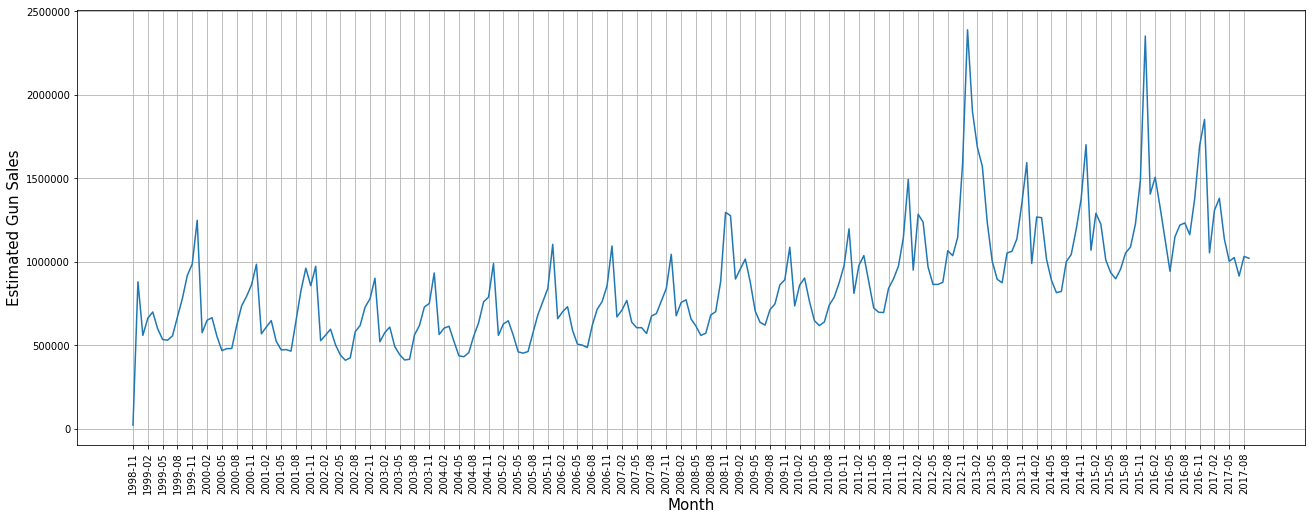

In [77]:
x = new_df1_bymonth['month']
y = new_df1_bymonth['estimated_gun_sales']
egs_bymonth = plt.plot(x, y)
plt.rcParams['figure.figsize'] = [22,8]
tickvalues_bymonth = range(0,len(new_df1_bymonth['month']),3)
labels_bymonth = new_df1_bymonth['month'].iloc[::3]
plt.xticks(tickvalues_bymonth, labels_bymonth, rotation=90, fontsize=10)
plt.xlabel('Month', fontsize=15)
plt.ylabel('Estimated Gun Sales', fontsize=15)
plt.grid(True)
plt.show()

#### To find out the growth in gun sales for each state we will minus the value for the latest month by the value for the earliest month. 

In [78]:
states = new_df1['state'].unique()
df1_growth = pd.DataFrame(columns=['state', 'gun_sales_growth'])
for s in states:
    df1_bystate = new_df1.query('state == @s')
    diff = df1_bystate['estimated_gun_sales'].iloc[0] - df1_bystate['estimated_gun_sales'].iloc[-1]
    df_diff = pd.DataFrame([[s, diff]], columns=['state', 'gun_sales_growth'])
    df1_growth = pd.concat([df1_growth, df_diff], ignore_index=True)

In [79]:
df1_growth = df1_growth.sort_values(by='gun_sales_growth', ascending=False)

In [80]:
df1_growth

state gun_sales_growth
46                 Texas            88208
4             California            66087
9                Florida            65447
40          Pennsylvania            58330
37                  Ohio            40681
50              Virginia            38192
45             Tennessee            36142
27              Missouri            35870
5               Colorado            33536
14              Illinois            32948
15               Indiana            30978
51            Washington            28096
34              New York            27085
53             Wisconsin            26275
39                Oregon            25294
19             Louisiana            24943
2                Arizona            21746
10               Georgia            21731
24              Michigan            21098
38              Oklahoma            20584
25             Minnesota            19495
18              Kentucky            17373
43        South Carolina            15555
26           Mississippi            13466
35        North Carolina            13431
52         West Virginia            12826
0                Alabama            12716
3               Arkansas            11525
33            New Mexico            11131
17                Kansas            10646
13                 Idaho             9343
22              Maryland             8898
23         Massachusetts             8582
31         New Hampshire             8369
20                 Maine             8229
28               Montana             8209
32            New Jersey             7644
6            Connecticut             7451
30                Nevada             7443
47                  Utah             7186
44          South Dakota             6993
1                 Alaska             5938
36          North Dakota             4806
54               Wyoming             3768
7               Delaware             3322
48               Vermont             3250
16                  Iowa             2887
29              Nebraska             2208
42          Rhode Island             1961
41           Puerto Rico              858
11                  Guam              139
8   District of Columbia               66
21       Mariana Islands               18
49        Virgin Islands                9
12                Hawaii               -1

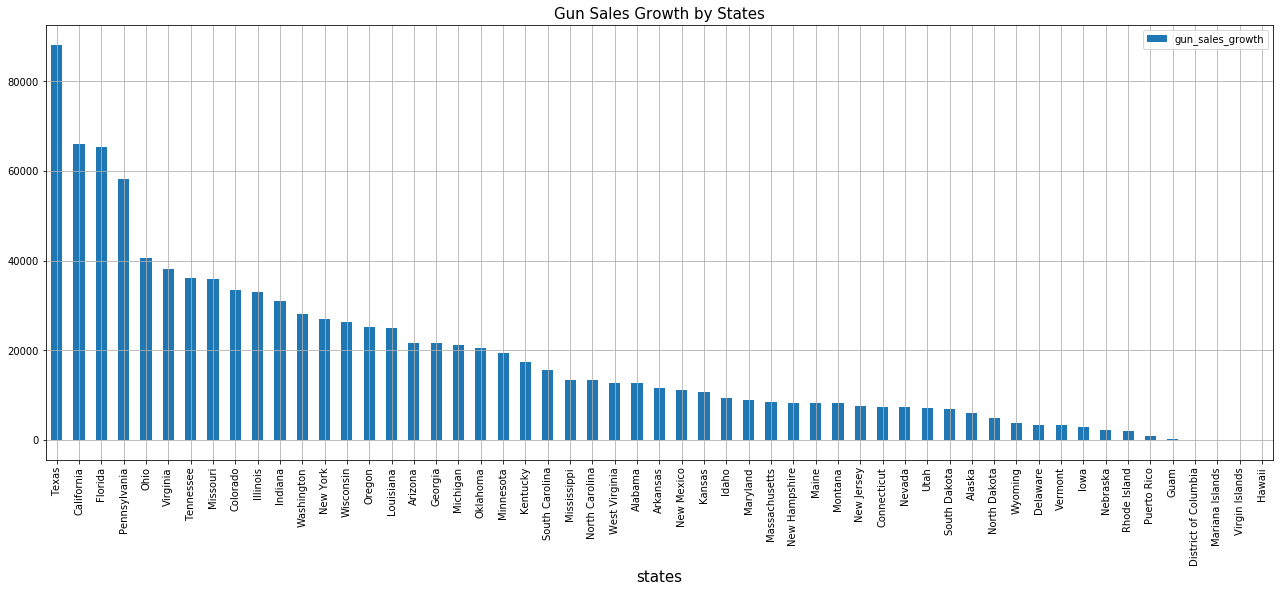

In [81]:
df1_growth.plot(kind='bar')
plt.rcParams['figure.figsize'] = [22,6]
tickvalues = range(0,len(df1_growth['state']))
labels = df1_growth['state']
plt.xticks(tickvalues, labels, fontsize=10)
plt.xlabel('states', fontsize=15)
plt.title('Gun Sales Growth by States', fontsize=15)
plt.grid(True)
plt.show()

### We've found out that from late 1998 to Sep. 2017 the top 5 states with the highest gun sales growth are Texas, California, Florida, Penn, and Ohio.

### Research Question 2  (What census data is most associated with gun per capita?)

In [82]:
new_df1[new_df1['month'].str.contains('2016-06')]

month                 state  handgun  long_gun  multiple  \
825  2016-06               Alabama     9146      7273       431   
826  2016-06                Alaska     2987      3204       185   
827  2016-06               Arizona    12942      8614       685   
828  2016-06              Arkansas     5454      4574       333   
829  2016-06            California    43042     37512         0   
830  2016-06              Colorado    17790     15115      1061   
831  2016-06           Connecticut    12011      3974         0   
832  2016-06              Delaware     1842      1621        93   
833  2016-06  District of Columbia       46         3         0   
834  2016-06               Florida    55934     29501      2428   
835  2016-06               Georgia    13307      7859       550   
836  2016-06                  Guam      104        50         3   
837  2016-06                Hawaii        0         0         0   
838  2016-06                 Idaho     3445      4143       192   
839  2016-06              Illinois    22277     12787       891   
840  2016-06               Indiana    18307     11949       674   
841  2016-06                  Iowa      129      2004         8   
842  2016-06                Kansas     5275      4447       306   
843  2016-06              Kentucky     8703      6584       499   
844  2016-06             Louisiana    12082      8428       596   
845  2016-06                 Maine     3433      2943       183   
846  2016-06       Mariana Islands        0         1         0   
847  2016-06              Maryland     4288      4864        49   
848  2016-06         Massachusetts     5965      3404       241   
849  2016-06              Michigan    10335      8282       227   
850  2016-06             Minnesota     8880      9723       433   
851  2016-06           Mississippi     7804      4692       369   
852  2016-06              Missouri    18770     13295       958   
853  2016-06               Montana     2968      4379       171   
854  2016-06              Nebraska      107      1609         6   
855  2016-06                Nevada     4949      3114       279   
856  2016-06         New Hampshire     5166      3453         6   
857  2016-06            New Jersey     6266      4294         0   
858  2016-06            New Mexico     5336      4231       300   
859  2016-06              New York    10062     12213       200   
860  2016-06        North Carolina     1181     11749       223   
861  2016-06          North Dakota     1312      2377        64   
862  2016-06                  Ohio    24397     17086      1203   
863  2016-06              Oklahoma    11933      8811       802   
864  2016-06                Oregon    14054     11400         0   
865  2016-06          Pennsylvania    44677     11841         0   
866  2016-06           Puerto Rico     1025       214        18   
867  2016-06          Rhode Island     1146       862       173   
868  2016-06        South Carolina     9619      5599       348   
869  2016-06          South Dakota     2460      3139       143   
870  2016-06             Tennessee    22476     15194      1465   
871  2016-06                 Texas    46816     33501      2509   
872  2016-06                  Utah     3433      3731       186   
873  2016-06               Vermont     1240      1225        85   
874  2016-06        Virgin Islands       24         7         1   
875  2016-06              Virginia    20132     15480         0   
876  2016-06            Washington    17040     13267       711   
877  2016-06         West Virginia     6602      4821       392   
878  2016-06             Wisconsin    12464     11144        70   
879  2016-06               Wyoming     1638      2110       104   

     estimated_gun_sales  
825                18923  
826                 7180  
827                25082  
828                11697  
829                88609  
830                38318  
831                17584  
832                 3995  
833        

In [83]:
df1_till201606 = new_df1.iloc[825:,:]

In [84]:
df1_till201606.head()

month       state  handgun  long_gun  multiple  estimated_gun_sales
825  2016-06     Alabama     9146      7273       431                18923
826  2016-06      Alaska     2987      3204       185                 7180
827  2016-06     Arizona    12942      8614       685                25082
828  2016-06    Arkansas     5454      4574       333                11697
829  2016-06  California    43042     37512         0                88609

#### In response to July 1, 2016 in df2, we dropped the rows above 2016-06 in df1, so it would make sense to analyse across the two dataframes.


In [85]:
df1_till201606_bystate = df1_till201606.groupby('state').sum()

In [86]:
df1_till201606_bystate.reset_index(inplace=True)

In [87]:
df1_till201606_bystate.head()

state  handgun  long_gun  multiple  estimated_gun_sales
0     Alabama  2096048   2510755     99488              5266460
1      Alaska   390340    528671     26034              1062983
2     Arizona  1587079   1351375     75072              3382443
3    Arkansas   875711   1567610     56534              2800727
4  California  5235333   5351264    207864             12060984

#### Because in df2 for each fact and each state there is only one value, we did the same to df1 by using groupby and sum.

In [88]:
df2_2016 = df2[df2['Fact'].str.contains('2016')]
df2_2016 = df2_2016.drop([1,2])

In [89]:
df2_2016.reset_index(drop=True, inplace=True)

In [90]:
df2_2016.head()

Fact    Alabama   Alaska  \
0       Population estimates, July 1, 2016,  (V2016)  4,863,300  741,894   
1  Persons under 5 years, percent, July 1, 2016, ...      6.00%    7.30%   
2  Persons under 18 years, percent, July 1, 2016,...     22.60%   25.20%   
3  Persons 65 years and over, percent,  July 1, 2...     16.10%   10.40%   
4   Female persons, percent,  July 1, 2016,  (V2016)     51.60%   47.70%   

     Arizona   Arkansas  California   Colorado Connecticut Delaware  \
0  6,931,071  2,988,248  39,250,017  5,540,545   3,576,452  952,065   
1      6.30%      6.40%       6.30%      6.10%       5.20%    5.80%   
2     23.50%     23.60%      23.20%     22.80%      21.10%   21.50%   
3     16.90%     16.30%      13.60%     13.40%      16.10%   17.50%   
4     50.30%     50.90%      50.30%     49.70%      51.20%   51.60%   

      Florida   ...    South Dakota Tennessee       Texas       Utah  Vermont  \
0  20,612,439   ...          865454   6651194  27,862,596  3,051,217  624,594   
1       5.50%   ...           0.071     0.061       7.20%      8.30%    4.90%   
2      20.10%   ...           0.246     0.226      26.20%     30.20%   19.00%   
3      19.90%   ...            0.16     0.157      12.00%     10.50%   18.10%   
4      51.10%   ...           0.496     0.512      50.40%     49.70%   50.60%   

    Virginia Washington West Virginia  Wisconsin  Wyoming  
0  8,411,808  7,288,000     1,831,102  5,778,708  585,501  
1      6.10%      6.20%         5.50%      5.80%    6.50%  
2     22.20%     22.40%        20.50%     22.30%   23.70%  
3     14.60%     14.80%        18.80%     16.10%   15.00%  
4     50.80%     50.00%        50.50%     50.30%   48.90%  

[5 rows x 51 columns]

#### We created a new dataframe that contains only facts for 2016.
#### Also when we reviewed the facts we noticed that two of them are actually for 2010, so we dropped those two rows.

In [91]:
df2_2016_T = df2_2016.T

In [92]:
df2_2016_T.columns = df2_2016_T.iloc[0]

In [93]:
df2_2016_T = df2_2016_T.iloc[1: , :]

In [94]:
df2_2016_T.reset_index(inplace=True)

In [95]:
df2_2016_T = df2_2016_T.rename(columns = {'index':'state'})
df2_2016_T = df2_2016_T.rename_axis(None, axis=1)

In [96]:
df2_2016_T.head()

state Population estimates, July 1, 2016,  (V2016)  \
0     Alabama                                    4,863,300   
1      Alaska                                      741,894   
2     Arizona                                    6,931,071   
3    Arkansas                                    2,988,248   
4  California                                   39,250,017   

  Persons under 5 years, percent, July 1, 2016,  (V2016)  \
0                                              6.00%       
1                                              7.30%       
2                                              6.30%       
3                                              6.40%       
4                                              6.30%       

  Persons under 18 years, percent, July 1, 2016,  (V2016)  \
0                                             22.60%        
1                                             25.20%        
2                                             23.50%        
3                                             23.60%        
4                                             23.20%        

  Persons 65 years and over, percent,  July 1, 2016,  (V2016)  \
0                                             16.10%            
1                                             10.40%            
2                                             16.90%            
3                                             16.30%            
4                                             13.60%            

  Female persons, percent,  July 1, 2016,  (V2016)  \
0                                           51.60%   
1                                           47.70%   
2                                           50.30%   
3                                           50.90%   
4                                           50.30%   

  White alone, percent, July 1, 2016,  (V2016)  \
0                                       69.30%   
1                                       66.10%   
2                                       83.30%   
3                                       79.40%   
4                                       72.70%   

  Black or African American alone, percent, July 1, 2016,  (V2016)  \
0                                             26.80%                 
1                                              3.80%                 
2                                              4.90%                 
3                                             15.70%                 
4                                              6.50%                 

  American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)  \
0                                              0.70%                         
1                                             15.20%                         
2                                              5.40%                         
3                                              1.00%                         
4                                              1.70%                         

  Asian alone, percent, July 1, 2016,  (V2016)  \
0                                        1.40%   
1                                        6.30%   
2                                        3.40%   
3                                        1.60%   
4                                       14.80%   

  Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016,  (V2016)  \
0                                              0.10%                                  
1                                              1.30%                                  
2                                              0.30%                                  
3                                              0.30%                                  
4                                              0.50%                                  

  Two or More Races, percent, July 1, 2016,  (V2016)  \
0                                              1.60%   
1                                              7.30%   
2       

#### We want to combine df1 and df2, so we had to convert the states from columns to rows in df2 by using transpose.

In [97]:
df2_2016_T.rename(columns=lambda x: x.strip().lower(), inplace=True)

In [98]:
df2_2016_T.rename(columns=lambda x: x.strip().replace("(", ""), inplace=True)
df2_2016_T.rename(columns=lambda x: x.strip().replace(")", ""), inplace=True)

In [99]:
df2_2016_T.rename(columns=lambda x: x.strip().replace(",", ""), inplace=True)

In [100]:
df2_2016_T.rename(columns=lambda x: x.strip().replace(" ", "_"), inplace=True)

In [101]:
df2_2016_T.rename(columns=lambda x: x.strip().replace("_july_1_2016__v2016", ""), inplace=True)

In [102]:
df2_2016_T.rename(columns=lambda x: x.strip().replace("_2016", ""), inplace=True)

In [103]:
df2_2016_T.head(5)

state population_estimates persons_under_5_years_percent  \
0     Alabama            4,863,300                         6.00%   
1      Alaska              741,894                         7.30%   
2     Arizona            6,931,071                         6.30%   
3    Arkansas            2,988,248                         6.40%   
4  California           39,250,017                         6.30%   

  persons_under_18_years_percent persons_65_years_and_over_percent_  \
0                         22.60%                             16.10%   
1                         25.20%                             10.40%   
2                         23.50%                             16.90%   
3                         23.60%                             16.30%   
4                         23.20%                             13.60%   

  female_persons_percent_ white_alone_percent  \
0                  51.60%              69.30%   
1                  47.70%              66.10%   
2                  50.30%              83.30%   
3                  50.90%              79.40%   
4                  50.30%              72.70%   

  black_or_african_american_alone_percent  \
0                                  26.80%   
1                                   3.80%   
2                                   4.90%   
3                                  15.70%   
4                                   6.50%   

  american_indian_and_alaska_native_alone_percent asian_alone_percent  \
0                                           0.70%               1.40%   
1                                          15.20%               6.30%   
2                                           5.40%               3.40%   
3                                           1.00%               1.60%   
4                                           1.70%              14.80%   

  native_hawaiian_and_other_pacific_islander_alone_percent  \
0                                              0.10%         
1                                              1.30%         
2                                              0.30%         
3                                              0.30%         
4                                              0.50%         

  two_or_more_races_percent hispanic_or_latino_percent  \
0                     1.60%                      4.20%   
1                     7.30%                      7.00%   
2                     2.80%                     30.90%   
3                     2.00%                      7.30%   
4                     3.80%                     38.90%   

  white_alone_not_hispanic_or_latino_percent housing_units_ building_permits  
0                                     65.80%      2,230,185           15,001  
1                                     61.20%        310,658            1,503  
2                                     55.50%      2,961,003           35,578  
3                                     72.90%      1,354,762            9,474  
4                                     37.70%     14,060,525          102,350

#### We removed the words that we don't need in the headers, and converted the rest of the words to our standard format.

In [104]:
df2_2016_T.dtypes

state                                                       object
population_estimates                                        object
persons_under_5_years_percent                               object
persons_under_18_years_percent                              object
persons_65_years_and_over_percent_                          object
female_persons_percent_                                     object
white_alone_percent                                         object
black_or_african_american_alone_percent                     object
american_indian_and_alaska_native_alone_percent             object
asian_alone_percent                                         object
native_hawaiian_and_other_pacific_islander_alone_percent    object
two_or_more_races_percent                                   object
hispanic_or_latino_percent                                  object
white_alone_not_hispanic_or_latino_percent                  object
housing_units_                                              ob

In [105]:
for cols in df2_2016_T.columns:
    df2_2016_T[cols]=df2_2016_T[cols].str.replace(',','')
    df2_2016_T[cols]=df2_2016_T[cols].str.replace('%','')

In [106]:
for cols in df2_2016_T.columns:
    df2_2016_T[cols]=df2_2016_T[cols].str.replace('.','')

In [107]:
df2_2016_T

state population_estimates persons_under_5_years_percent  \
0          Alabama              4863300                           600   
1           Alaska               741894                           730   
2          Arizona              6931071                           630   
3         Arkansas              2988248                           640   
4       California             39250017                           630   
5         Colorado              5540545                           610   
6      Connecticut              3576452                           520   
7         Delaware               952065                           580   
8          Florida             20612439                           550   
9          Georgia             10310371                           640   
10          Hawaii              1428557                           640   
11           Idaho              1683140                           680   
12        Illinois             12801539                           600   
13         Indiana              6633053                           640   
14            Iowa              3134693                           640   
15          Kansas              2907289                           670   
16        Kentucky              4436974                           620   
17       Louisiana              4681666                           660   
18           Maine              1331479                           490   
19        Maryland              6016447                           610   
20   Massachusetts              6811779                           530   
21        Michigan              9928300                           580   
22       Minnesota              5519952                           640   
23     Mississippi              2988726                           630   
24        Missouri              6093000                           610   
25         Montana              1042520                           600   
26        Nebraska              1907116                           700   
27          Nevada              2940058                           630   
28   New Hampshire              1334795                           480   
29      New Jersey              8944469                           580   
30      New Mexico              2081015                          0062   
31        New York             19745289                          0059   
32  North Carolina             10146788                           006   
33    North Dakota               757952                          0073   
34            Ohio             11614373                           006   
35        Oklahoma              3923561                          0068   
36          Oregon              4093465                          0058   
37    Pennsylvania             12784227                          0056   
38    Rhode Island              1056426                          0052   
39  South Carolina              4961119                          0059   
40    South Dakota               865454                          0071   
41       Tennessee              6651194                          0061   
42           Texas             27862596                           720   
43            Utah              3051217                           830   
44         Vermont               624594                           490   
45        Virginia              8411808                           610   
46      Washington              7288000                           620   
47   West Virginia              1831102                           550   
48       Wisconsin              5778708                           580   
49         Wyoming               585501                           650   

   persons_under_18_years_percent persons_65_years_and_over_percent_  \
0                            2260                               1610   
1                            2520                               1040   
2                            2350                               1690   
3

#### We found that all the values in df2 are type object, and we don't want that
#### We removed all the special characters such as "%" so we can use astype
#### However, we found that there is a non-numeric value Z in some rows.

In [108]:
df2_2016_T = df2_2016_T.replace('Z', 0)

In [109]:
df2_2016_T

state population_estimates persons_under_5_years_percent  \
0          Alabama              4863300                           600   
1           Alaska               741894                           730   
2          Arizona              6931071                           630   
3         Arkansas              2988248                           640   
4       California             39250017                           630   
5         Colorado              5540545                           610   
6      Connecticut              3576452                           520   
7         Delaware               952065                           580   
8          Florida             20612439                           550   
9          Georgia             10310371                           640   
10          Hawaii              1428557                           640   
11           Idaho              1683140                           680   
12        Illinois             12801539                           600   
13         Indiana              6633053                           640   
14            Iowa              3134693                           640   
15          Kansas              2907289                           670   
16        Kentucky              4436974                           620   
17       Louisiana              4681666                           660   
18           Maine              1331479                           490   
19        Maryland              6016447                           610   
20   Massachusetts              6811779                           530   
21        Michigan              9928300                           580   
22       Minnesota              5519952                           640   
23     Mississippi              2988726                           630   
24        Missouri              6093000                           610   
25         Montana              1042520                           600   
26        Nebraska              1907116                           700   
27          Nevada              2940058                           630   
28   New Hampshire              1334795                           480   
29      New Jersey              8944469                           580   
30      New Mexico              2081015                          0062   
31        New York             19745289                          0059   
32  North Carolina             10146788                           006   
33    North Dakota               757952                          0073   
34            Ohio             11614373                           006   
35        Oklahoma              3923561                          0068   
36          Oregon              4093465                          0058   
37    Pennsylvania             12784227                          0056   
38    Rhode Island              1056426                          0052   
39  South Carolina              4961119                          0059   
40    South Dakota               865454                          0071   
41       Tennessee              6651194                          0061   
42           Texas             27862596                           720   
43            Utah              3051217                           830   
44         Vermont               624594                           490   
45        Virginia              8411808                           610   
46      Washington              7288000                           620   
47   West Virginia              1831102                           550   
48       Wisconsin              5778708                           580   
49         Wyoming               585501                           650   

   persons_under_18_years_percent persons_65_years_and_over_percent_  \
0                            2260                               1610   
1                            2520                               1040   
2                            2350                               1690   
3

#### We replaced 'Z' with 0, because we believe 'Z' was short for Zero.

In [110]:
for column in df2_2016_T.columns[1:]:
    df2_2016_T[column]=df2_2016_T[column].astype(float)

In [111]:
df2_2016_T.head()

state  population_estimates  persons_under_5_years_percent  \
0     Alabama             4863300.0                          600.0   
1      Alaska              741894.0                          730.0   
2     Arizona             6931071.0                          630.0   
3    Arkansas             2988248.0                          640.0   
4  California            39250017.0                          630.0   

   persons_under_18_years_percent  persons_65_years_and_over_percent_  \
0                          2260.0                              1610.0   
1                          2520.0                              1040.0   
2                          2350.0                              1690.0   
3                          2360.0                              1630.0   
4                          2320.0                              1360.0   

   female_persons_percent_  white_alone_percent  \
0                   5160.0               6930.0   
1                   4770.0               6610.0   
2                   5030.0               8330.0   
3                   5090.0               7940.0   
4                   5030.0               7270.0   

   black_or_african_american_alone_percent  \
0                                   2680.0   
1                                    380.0   
2                                    490.0   
3                                   1570.0   
4                                    650.0   

   american_indian_and_alaska_native_alone_percent  asian_alone_percent  \
0                                             70.0                140.0   
1                                           1520.0                630.0   
2                                            540.0                340.0   
3                                            100.0                160.0   
4                                            170.0               1480.0   

   native_hawaiian_and_other_pacific_islander_alone_percent  \
0                                               10.0          
1                                              130.0          
2                                               30.0          
3                                               30.0          
4                                               50.0          

   two_or_more_races_percent  hispanic_or_latino_percent  \
0                      160.0                       420.0   
1                      730.0                       700.0   
2                      280.0                      3090.0   
3                      200.0                       730.0   
4                      380.0                      3890.0   

   white_alone_not_hispanic_or_latino_percent  housing_units_  \
0                                      6580.0       2230185.0   
1                                      6120.0        310658.0   
2                                      5550.0       2961003.0   
3                                      7290.0       1354762.0   
4                                      3770.0      14060525.0   

   building_permits  
0           15001.0  
1            1503.0  
2           35578.0  
3            9474.0  
4          102350.0

In [112]:
for column in df2_2016_T.columns[2:14]:
    df2_2016_T[column]=df2_2016_T[column] / 10000

In [113]:
df2_2016_T.head()

state  population_estimates  persons_under_5_years_percent  \
0     Alabama             4863300.0                          0.060   
1      Alaska              741894.0                          0.073   
2     Arizona             6931071.0                          0.063   
3    Arkansas             2988248.0                          0.064   
4  California            39250017.0                          0.063   

   persons_under_18_years_percent  persons_65_years_and_over_percent_  \
0                           0.226                               0.161   
1                           0.252                               0.104   
2                           0.235                               0.169   
3                           0.236                               0.163   
4                           0.232                               0.136   

   female_persons_percent_  white_alone_percent  \
0                    0.516                0.693   
1                    0.477                0.661   
2                    0.503                0.833   
3                    0.509                0.794   
4                    0.503                0.727   

   black_or_african_american_alone_percent  \
0                                    0.268   
1                                    0.038   
2                                    0.049   
3                                    0.157   
4                                    0.065   

   american_indian_and_alaska_native_alone_percent  asian_alone_percent  \
0                                            0.007                0.014   
1                                            0.152                0.063   
2                                            0.054                0.034   
3                                            0.010                0.016   
4                                            0.017                0.148   

   native_hawaiian_and_other_pacific_islander_alone_percent  \
0                                              0.001          
1                                              0.013          
2                                              0.003          
3                                              0.003          
4                                              0.005          

   two_or_more_races_percent  hispanic_or_latino_percent  \
0                      0.016                       0.042   
1                      0.073                       0.070   
2                      0.028                       0.309   
3                      0.020                       0.073   
4                      0.038                       0.389   

   white_alone_not_hispanic_or_latino_percent  housing_units_  \
0                                       0.658       2230185.0   
1                                       0.612        310658.0   
2                                       0.555       2961003.0   
3                                       0.729       1354762.0   
4                                       0.377      14060525.0   

   building_permits  
0           15001.0  
1            1503.0  
2           35578.0  
3            9474.0  
4          102350.0

In [132]:
df2_2016_T.describe()

population_estimates  persons_under_5_years_percent  \
count          5.000000e+01                      50.000000   
mean           6.448927e+06                       0.048082   
std            7.271769e+06                       0.025047   
min            5.855010e+05                       0.000600   
25%            1.850106e+06                       0.048250   
50%            4.559320e+06                       0.060000   
75%            7.198768e+06                       0.064000   
max            3.925002e+07                       0.083000   

       persons_under_18_years_percent  persons_65_years_and_over_percent_  \
count                       50.000000                           50.000000   
mean                         0.179098                            0.121006   
std                          0.090828                            0.063509   
min                          0.019700                            0.001500   
25%                          0.190250                            0.104250   
50%                          0.222500                            0.150000   
75%                          0.234500                            0.161000   
max                          0.302000                            0.199000   

       female_persons_percent_  white_alone_percent  \
count                50.000000            50.000000   
mean                  0.394238             0.619884   
std                   0.199636             0.331932   
min                   0.005100             0.007100   
25%                   0.480000             0.341750   
50%                   0.503000             0.774000   
75%                   0.509000             0.872750   
max                   0.516000             0.948000   

       black_or_african_american_alone_percent  \
count                                50.000000   
mean                                  0.085994   
std                                   0.097316   
min                                   0.000200   
25%                                   0.014250   
50%                                   0.047000   
75%                                   0.124000   
max                                   0.377000   

       american_indian_and_alaska_native_alone_percent  asian_alone_percent  \
count                                        50.000000            50.000000   
mean                                          0.012348             0.036958   
std                                           0.023446             0.057519   
min                                           0.000100             0.001500   
25%                                           0.004000             0.008225   
50%                                           0.006000             0.023500   
75%                                           0.011750             0.045500   
max                                           0.152000             0.377000   

       native_hawaiian_and_other_pacific_islander_alone_percent  \
count                                          50.000000          
mean                                            0.003636          
std                                             0.014439          
min                                             0.000000          
25%                                             0.000200          
50%                                             0.001000          
75%                                             0.001000          
max                                             0.102000          

       two_or_more_races_percent  hispanic_or_latino_percent  \
count                  50.000000                    50.00000   
mean                    0.023680                     0.09086   
std                     0.033514                     0.09638   
min                     0.001800                     0.00070   
25%                     0.013000                     0.01675   
50%                     0.020000                     0.06250   
75%                     0.024750           

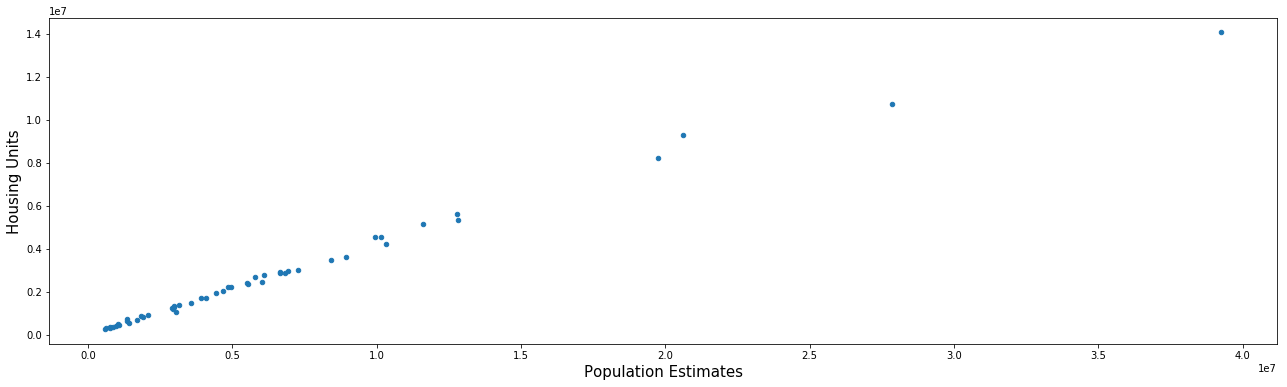

In [131]:
mn = df2_2016_T.plot.scatter('population_estimates', 'housing_units_')
plt.xlabel('Population Estimates', fontsize=15)
plt.ylabel('Housing Units', fontsize=15)
plt.show()

### The population is perfectly positively correlated to housing units.

#### We converted all numeric values to type float, and converted the percentage values to decimal ones.

In [64]:
df1_till201606_bystate.shape

(55, 5)

In [65]:
df2_2016_T.shape

(50, 16)

#### We want to make sure the state column in df1 is identical to df2
#### But we found out there are five more state names in df1 than df2

In [66]:
df1_till201606_bystate.state.unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Guam', 'Hawaii', 'Idaho', 'Illinois',
       'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine',
       'Mariana Islands', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska',
       'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virgin Islands', 'Virginia', 'Washington', 'West Virginia',
       'Wisconsin', 'Wyoming'], dtype=object)

In [67]:
df2_2016_T.state.unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

#### The five states are 'District of Columbia', 'Guam', 'Mariana Islands', 'Puerto Rico', 'Virgin Islands'

In [68]:
df1_till201606_bystate[df1_till201606_bystate['state'].str.contains('District of Columbia')]

state  handgun  long_gun  multiple  estimated_gun_sales
8  District of Columbia     3686       550        26                 4701

In [69]:
df1_till201606_bystate[df1_till201606_bystate['state'].str.contains('Guam')]

state  handgun  long_gun  multiple  estimated_gun_sales
11  Guam     6222      5266       345                13330

In [70]:
df1_till201606_bystate[df1_till201606_bystate['state'].str.contains('Mariana Islands')]

state  handgun  long_gun  multiple  estimated_gun_sales
21  Mariana Islands      171       154        14                  380

In [71]:
df1_till201606_bystate[df1_till201606_bystate['state'].str.contains('Puerto Rico')]

state  handgun  long_gun  multiple  estimated_gun_sales
41  Puerto Rico   139903     28445      3622               192429

In [72]:
df1_till201606_bystate[df1_till201606_bystate['state'].str.contains('Virgin Islands')]

state  handgun  long_gun  multiple  estimated_gun_sales
49  Virgin Islands     2761       348        59                 3542

In [73]:
df1_till201606_bystate = df1_till201606_bystate.drop([8,11,21,41,49])

In [74]:
df1_till201606_bystate.shape

(50, 5)

#### We found the index of the five rows and removed them

In [75]:
df_combined = df1_till201606_bystate.merge(df2_2016_T, left_on='state', right_on='state', how='inner')

In [76]:
df_combined.head(1)

state  handgun  long_gun  multiple  estimated_gun_sales  \
0  Alabama  2096048   2510755     99488              5266460   

   population_estimates  persons_under_5_years_percent  \
0             4863300.0                           0.06   

   persons_under_18_years_percent  persons_65_years_and_over_percent_  \
0                           0.226                               0.161   

   female_persons_percent_  white_alone_percent  \
0                    0.516                0.693   

   black_or_african_american_alone_percent  \
0                                    0.268   

   american_indian_and_alaska_native_alone_percent  asian_alone_percent  \
0                                            0.007                0.014   

   native_hawaiian_and_other_pacific_islander_alone_percent  \
0                                              0.001          

   two_or_more_races_percent  hispanic_or_latino_percent  \
0                      0.016                       0.042   

   white_alone_not_hispanic_or_latino_percent  housing_units_  \
0                                       0.658       2230185.0   

   building_permits  
0           15001.0

#### We combined the two dataframes we want to use

In [77]:
new_column = df_combined['estimated_gun_sales'] / df_combined['population_estimates']
df_combined.insert(6, 'gun_per_capita', new_column, True)

In [78]:
df_combined.head()

state  handgun  long_gun  multiple  estimated_gun_sales  \
0     Alabama  2096048   2510755     99488              5266460   
1      Alaska   390340    528671     26034              1062983   
2     Arizona  1587079   1351375     75072              3382443   
3    Arkansas   875711   1567610     56534              2800727   
4  California  5235333   5351264    207864             12060984   

   population_estimates  gun_per_capita  persons_under_5_years_percent  \
0             4863300.0        1.082898                          0.060   
1              741894.0        1.432796                          0.073   
2             6931071.0        0.488012                          0.063   
3             2988248.0        0.937247                          0.064   
4            39250017.0        0.307286                          0.063   

   persons_under_18_years_percent  persons_65_years_and_over_percent_  ...  \
0                           0.226                               0.161  ...   
1                           0.252                               0.104  ...   
2                           0.235                               0.169  ...   
3                           0.236                               0.163  ...   
4                           0.232                               0.136  ...   

   white_alone_percent  black_or_african_american_alone_percent  \
0                0.693                                    0.268   
1                0.661                                    0.038   
2                0.833                                    0.049   
3                0.794                                    0.157   
4                0.727                                    0.065   

   american_indian_and_alaska_native_alone_percent  asian_alone_percent  \
0                                            0.007                0.014   
1                                            0.152                0.063   
2                                            0.054                0.034   
3                                            0.010                0.016   
4                                            0.017                0.148   

   native_hawaiian_and_other_pacific_islander_alone_percent  \
0                                              0.001          
1                                              0.013          
2                                              0.003          
3                                              0.003          
4                                              0.005          

   two_or_more_races_percent  hispanic_or_latino_percent  \
0                      0.016                       0.042   
1                      0.073                       0.070   
2                      0.028                       0.309   
3                      0.020                       0.073   
4                      0.038                       0.389   

   white_alone_not_hispanic_or_latino_percent  housing_units_  \
0                                       0.658       2230185.0   
1                                       0.612        310658.0   
2                                       0.555       2961003.0   
3                                       0.729       1354762.0   
4                                       0.377      14060525.0   

   building_permits  
0           15001.0  
1            1503.0  
2           35578.0  
3            9474.0  
4          102350.0  

[5 rows x 21 columns]

#### We added a column, value of which equals gun sales divided by population

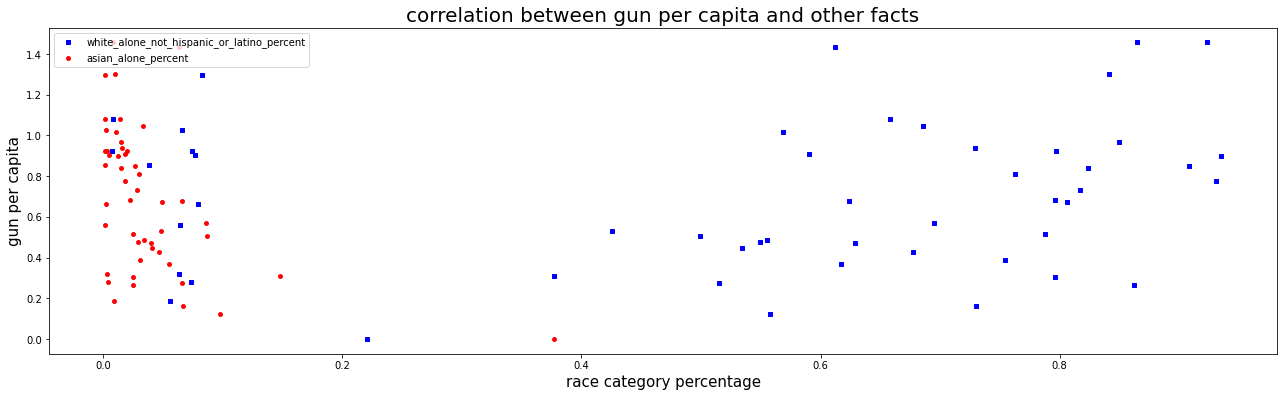

In [79]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
y = df_combined['gun_per_capita']
a = df_combined['white_alone_not_hispanic_or_latino_percent']
b = df_combined['asian_alone_percent']
ax1.scatter(a, y, s=15, c='b', marker="s", label='white_alone_not_hispanic_or_latino_percent')
ax1.scatter(b, y, s=15, c='r', marker="o", label='asian_alone_percent')
plt.title('correlation between gun per capita and other facts', fontsize = 20)
plt.xlabel('race category percentage', fontsize = 15)
plt.ylabel('gun per capita', fontsize = 15)
plt.legend(loc='upper left');
plt.show()

<a id='conclusions'></a>
## Conclusions
### The findings
#### 1. From late 1998 to Sep. 2017 the top 5 states with the highest gun sales growth are Texas, California, Florida, Penn, and Ohio.
#### 2. As of June 2016, the gun sales per capita appears to be negatively correlated to the percentage of Asian alone, and positively correlated to the percentage of white alone excluding hispanic or latino.
### The Limitations
#### 1. The original df2 has only one value for each combination of the facts and the states, in other words we basically have only 50 samples after combining the two dataframes, and as a result the scatter plot doesn't show a perfect correlation.
#### 2. The same process can be done for the 2011-2015 facts instead of the 2016 ones, and in that case we may find fact(s) that is better correlated to gun sales per capita.

> **Tip**: Finally, summarize your findings and the results that have been performed in relation to the question(s) provided at the beginning of the analysis. Summarize the results accurately, and point out where additional research can be done or where additional information could be useful.

> **Tip**: Make sure that you are clear with regards to the limitations of your exploration. You should have at least 1 limitation explained clearly. 

> **Tip**: If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])